<a href="https://colab.research.google.com/github/MahalakshmiDSML/Machine-Learning-Assignment---5/blob/main/ML_Assignment_5_Random_Forest%2C_Naive_Bayes%2C_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ML Assignment 5 – Random Forest, Naive Bayes, SVM**

##**Crowdfunding Campaign Success Prediction**


##**Machine Learning Model Building Steps:-**

###**1.	Data Preprocessing:**


###**1.1.	Load the Dataset: Load the dataset and perform an initial exploration to understand its structure and content.**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dd=pd.read_csv("/content/ML Assignment 5 - Random Forest, Naive Bayes, SVM DATA.txt")
dd.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
dd.shape

(100000, 14)

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB


In [ ]:
dd.describe()

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


In [ ]:
dd.columns

Index(['CampaignID', 'GoalAmount', 'RaisedAmount', 'DurationDays',
       'NumBackers', 'Category', 'LaunchMonth', 'Country', 'Currency',
       'OwnerExperience', 'VideoIncluded', 'SocialMediaPresence', 'NumUpdates',
       'IsSuccessful'],
      dtype='object')

In [ ]:
dd.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
99995,False
99996,False
99997,False
99998,False


In [ ]:
dd.duplicated().sum()

np.int64(0)

**Summary:  No Dupllicate values.**

###**1.2.	Handle Missing Values: Check for and handle any missing values in the dataset if present.**


In [ ]:
dd.isnull().sum()

,0
CampaignID,0
GoalAmount,0
RaisedAmount,0
DurationDays,0
NumBackers,0
Category,0
LaunchMonth,0
Country,0
Currency,0
OwnerExperience,0


In [ ]:
nullcount=dd.isna().sum()
nullcount[nullcount>0]

,0


**No Null Values.**

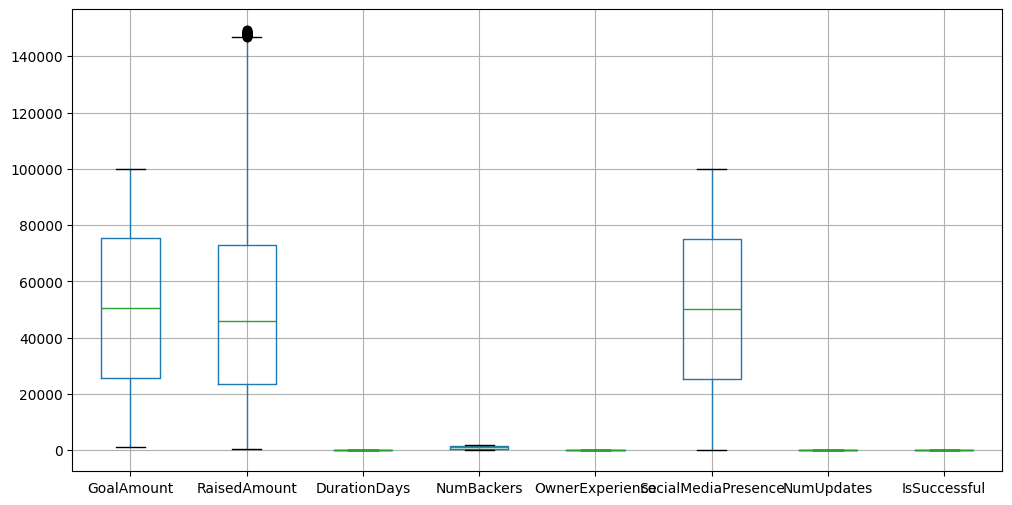

In [ ]:
plt.figure(figsize=(12,6))
dd.boxplot()
plt.show()

###**1.3.	Encode Categorical Features: Convert categorical features into numerical format using appropriate encoding techniques.**


In [ ]:
dd.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
dd['VideoIncluded encoder']=label.fit_transform(dd['VideoIncluded'])
dd.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful,VideoIncluded encoder
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0,1
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0,1
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1,0
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1,0
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0,1


In [ ]:
dd['Country'].value_counts()

,count
Country,
Germany,20201
USA,20046
Australia,20038
UK,19994
Canada,19721


In [ ]:
dd['Category'].value_counts()

,count
Category,
Art,20145
Film,20096
Technology,19963
Music,19954
Games,19842


In [ ]:
dd['LaunchMonth'].value_counts()

,count
LaunchMonth,
December,8487
April,8441
June,8430
March,8416
September,8360
May,8348
November,8314
October,8307
July,8281


In [ ]:
dd['Currency'].value_counts()

,count
Currency,
GBP,20196
USD,20073
EUR,20068
AUD,19875
CAD,19788


In [ ]:
dd['IsSuccessful'].value_counts()

,count
IsSuccessful,
1,50094
0,49906


In [ ]:
dd['VideoIncluded encoder'].value_counts()

,count
VideoIncluded encoder,
0,50182
1,49818


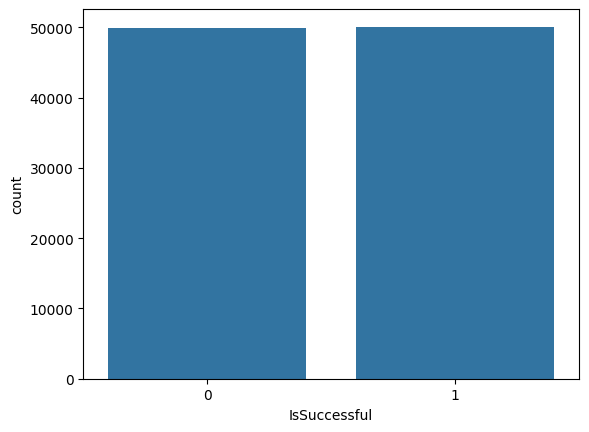

In [ ]:
sns.countplot(x='IsSuccessful', data=dd)
plt.show()

###**1.4.	Feature Selection: Select the relevant features and the target variable for your analysis.**


In [ ]:
X=dd.drop('IsSuccessful',axis=1)
y=dd['IsSuccessful']

In [ ]:
dd.shape

(100000, 15)

In [ ]:
X.shape

(100000, 14)

In [ ]:
y.shape

(100000,)

###**1.5.	Data Splitting: Split the dataset into training and testing sets (e.g., 75% training, 25% testing).**


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape

(80000, 14)

In [ ]:
X_test.shape

(20000, 14)

In [ ]:
y_train.shape

(80000,)

In [ ]:
y_test.shape

(20000,)

###**1.6.	Feature Scaling: Standardize or normalize numerical features using parameters derived from the training set, and apply the same scaling to the test set.**

**Standardize**

In [ ]:
X_train.columns

Index(['CampaignID', 'GoalAmount', 'RaisedAmount', 'DurationDays',
       'NumBackers', 'Category', 'LaunchMonth', 'Country', 'Currency',
       'OwnerExperience', 'VideoIncluded', 'SocialMediaPresence', 'NumUpdates',
       'VideoIncluded encoder'],
      dtype='object')

In [ ]:
X_train.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,VideoIncluded encoder
75220,CID_75220,79039,95547.146450,79,1905,Film,July,Australia,GBP,13,No,65254,12,0
48955,CID_48955,60494,85923.818326,27,1180,Art,March,Australia,USD,10,Yes,12883,36,1
44966,CID_44966,36703,18859.194099,23,1827,Art,September,Australia,USD,16,Yes,52937,4,1
13568,CID_13568,49776,48036.232772,68,1123,Music,July,Canada,GBP,19,No,71225,37,0
92727,CID_92727,69975,104432.923802,44,556,Film,July,UK,USD,8,Yes,27359,14,1


In [ ]:
numeric_col=['GoalAmount','RaisedAmount','DurationDays','NumBackers','OwnerExperience','SocialMediaPresence','NumUpdates','VideoIncluded encoder']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[numeric_col]=scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col]=scaler.transform(X_test[numeric_col])

##**2.Random Forest - Model Building and Evaluation:**

###**2.1.	Model Building: Build a Random Forest model using the training dataset. Experiment with different values for the number of trees (n_estimators) in the forest and maximum depth (max_depth).**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
print("\n Random Forest")
rf_model=RandomForestClassifier(n_estimators=150,max_depth=6,random_state=42)
rf_model.fit(X_train[numeric_col],y_train)
rf_pred=rf_model.predict(X_test[numeric_col])
print("Accuracy(Random Forest):",accuracy_score(y_test,rf_pred))
print("Classification Report:\n" ,
      classification_report(y_test,rf_pred))


 Random Forest
Accuracy(Random Forest): 0.7629
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.97      0.80      9953
           1       0.95      0.56      0.70     10047

    accuracy                           0.76     20000
   macro avg       0.82      0.76      0.75     20000
weighted avg       0.82      0.76      0.75     20000



In [ ]:
print("\n Random Forest")
rf_model=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42)
rf_model.fit(X_train[numeric_col],y_train)
rf_pred=rf_model.predict(X_test[numeric_col])
print("Accuracy(Random Forest):",accuracy_score(y_test,rf_pred))


 Random Forest
Accuracy(Random Forest): 0.7348


**To change the estimators=100 and max_depth=4 and the Accuracy score is :0.73**

In [ ]:
print("\n Random Forest")
rf_model=RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42)
rf_model.fit(X_train[numeric_col],y_train)
rf_pred=rf_model.predict(X_test[numeric_col])
print("Accuracy(Random Forest):",accuracy_score(y_test,rf_pred))


 Random Forest
Accuracy(Random Forest): 0.7698666666666667


**To change the estimators=100 and max_depth=6 and the Accuracy score is :0.77**

###**2.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
print("\n hyperparameter tuning:Random forest")
param_grid={'n_estimators':[100,150,200],
            'max_depth':[5,6,7]}
grid_search=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=3,scoring='accuracy')
grid_search.fit(X_train[numeric_col],y_train)
print("\n best parameter:",grid_search.best_params_)
print("\n best Accuracy :",grid_search.best_score_)


 hyperparameter tuning:Random forest

 best parameter: {'max_depth': 7, 'n_estimators': 100}

 best Accuracy : 0.8074249879084192


In [ ]:
bestrf=grid_search.best_estimator_
bestrf_pred=bestrf.predict(X_test[numeric_col])
print("\n Accuracy score(Tuned Random Forest):",grid_search.best_score_)


 Accuracy score(Tuned Random Forest): 0.8074249879084192


**To change the estimators=100 and max_depth=8 using gridsearchcv and the Accuracy score is :0.83**

##**3.	Naive Bayes - Model Building and Evaluation:**

###**3.1.	Model Building: Build a Naive Bayes model using the training dataset. You can choose between Gaussian, Multinomial, or Bernoulli based on the nature of your features (e.g., GaussianNB() for continuous features).**



**Gaussian Model:**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [ ]:
# train gaussian naive bayes model
ganb=GaussianNB()
ganb.fit(X_train[numeric_col],y_train)


GaussianNB()

In [ ]:
# predict
gassianpred=ganb.predict(X_test[numeric_col])

###**3.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.**

In [ ]:
# Evaluate
print("Accuracy(Gaussian Model):",accuracy_score(y_test,gassianpred))
print(confusion_matrix(y_test, gassianpred))
print(classification_report(y_test, gassianpred))

Accuracy(Gaussian Model): 0.6659
[[12202  2805]
 [ 7218  7775]]
              precision    recall  f1-score   support

           0       0.63      0.81      0.71     15007
           1       0.73      0.52      0.61     14993

    accuracy                           0.67     30000
   macro avg       0.68      0.67      0.66     30000
weighted avg       0.68      0.67      0.66     30000



##**4.	Support Vector Machine (SVM) - Model Building and Evaluation:**

###**4.1.	Model Building: Build an SVM model using the training dataset. Experiment with different kernel functions (e.g., linear, RBF).**



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Linear Kernel
model_linear = SVC(kernel='linear')
model_linear.fit(X_train[numeric_col], y_train)
pred_linear = model_linear.predict(X_test[numeric_col])
print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))

Linear Kernel Accuracy: 0.9998


In [ ]:
# RBF Kernel
model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train[numeric_col], y_train)
pred_rbf = model_rbf.predict(X_test[numeric_col])
print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))

RBF Kernel Accuracy: 0.9933666666666666


###**4.2.	Model Evaluation: Evaluate the model on the testing dataset and report the accuracy score.**

In [ ]:
print("RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))
print("Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))

RBF Kernel Accuracy: 0.9933666666666666
Linear Kernel Accuracy: 0.9998


##**5.	Comparison and Analysis:**

###**5.1.	Compare the accuracy scores of the three models.**



In [ ]:
print("\n Accuracy(Random Forest):",accuracy_score(y_test,rf_pred))
print("\n Accuracy score(Tuned Random Forest):",grid_search.best_score_)
print("\n Accuracy(Gaussian Model):",accuracy_score(y_test,gassianpred))
print("\n RBF Kernel Accuracy:", accuracy_score(y_test, pred_rbf))
print("\n Linear Kernel Accuracy:", accuracy_score(y_test, pred_linear))


 Accuracy(Random Forest): 0.7698666666666667

 Accuracy score(Tuned Random Forest): 0.8074249879084192

 Accuracy(Gaussian Model): 0.6659

 RBF Kernel Accuracy: 0.9933666666666666

 Linear Kernel Accuracy: 0.9998


**Accuracy Scores Comparison**

**Random Forest: 0.770 (approximately 77.0%) accured**

**Tuned Random Forest: 0.807 (approximately 80.7%) accured**

**Gaussian Model: 0.666 (approximately 66.6%) accured**

**SVM with RBF Kernel: 0.993 (approximately 99.3%) accured**

**SVM with Linear Kernel: 0.9998 (approximately 99.98%) accured**

###**5.2.	Discuss which model performed best and why, based on the accuracy scores and other relevant factors.**


**SVM with Linear Kernel: 0.9998 (approximately 99.98%) accured this he best model**.

###**5.3.	Reflect on the strengths and weaknesses of each model in the context of this dataset.**

###**Random forest:**

strength: Easy and simple process.

weakness: In some times show low accuracy.

###**Tuned Random forest:**

strength: Improve accuracy

weakness: need more time for process.

###**Gaussian Model:**

strength: Simple and fast to train.

weakness:poor accuracy here.

###**SVM with RBF Kernel:**

strength: good accuracy in a dataset.

###**SVM with Linear Kernel:**

strength: best accuracy here.
